In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the train dataset
corpus = pd.read_csv('data_worthcheck/train.csv',delimiter=',',encoding='latin-1',index_col=[0])
corpus.head()

,text_a,label
0,betewe buka twitter cuman ngetweet liat home b...,no
1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no
2,e100ss gini buka informasi sejelas nya identit...,yes
3,neng solo wes ono terduga corona cobo neng ati...,no
4,midiahn nii akun gak takut takut nya isu coron...,no


In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21601 entries, 0 to 21600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text_a  21601 non-null  object
 1   label   21601 non-null  object
dtypes: object(2)
memory usage: 506.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CountLabel')

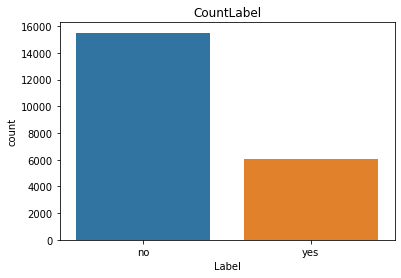

In [ ]:
sns.countplot(corpus.label)
plt.xlabel('Label')
plt.title('CountLabel')

In [ ]:
# Process the train dataset

# 1. Removing Blank Spaces
corpus['text_a'].dropna(inplace=True)
# 2. Changing all text to lowercase
corpus['text_original'] = corpus['text_a']
corpus['text_a'] = [entry.lower() for entry in corpus['text_a']]
# 3. Tokenization-In this each entry in the corpus will be broken into set of words
corpus['text_a']= [word_tokenize(entry) for entry in corpus['text_a']]

corpus.head()


,text_a,label,text_original
0,"[betewe, buka, twitter, cuman, ngetweet, liat,...",no,betewe buka twitter cuman ngetweet liat home b...
1,"[mas, piyuuu, mugo2, corona, tuh, mulut, tersu...",no,mas piyuuu mugo2 corona tuh mulut tersumpal ma...
2,"[e100ss, gini, buka, informasi, sejelas, nya, ...",yes,e100ss gini buka informasi sejelas nya identit...
3,"[neng, solo, wes, ono, terduga, corona, cobo, ...",no,neng solo wes ono terduga corona cobo neng ati...
4,"[midiahn, nii, akun, gak, takut, takut, nya, i...",no,midiahn nii akun gak takut takut nya isu coron...


In [ ]:
# 4. Remove Stop words and Non-Numeric
for index,entry in enumerate(corpus['text_a']):
    # Declaring Empty List to store the words that follow the rules for this step
    final_words = []
    for word in entry:
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('indonesian') and word.isalpha():
            final_words.append(word)
    # The final processed set of words for each iteration will be stored in 'text_final'
    corpus.loc[index,'text_final'] = str(final_words)

In [ ]:
corpus.head()

,text_a,label,text_original,text_final
0,"[betewe, buka, twitter, cuman, ngetweet, liat,...",no,betewe buka twitter cuman ngetweet liat home b...,"['betewe', 'buka', 'twitter', 'cuman', 'ngetwe..."
1,"[mas, piyuuu, mugo2, corona, tuh, mulut, tersu...",no,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,"['mas', 'piyuuu', 'corona', 'tuh', 'mulut', 't..."
2,"[e100ss, gini, buka, informasi, sejelas, nya, ...",yes,e100ss gini buka informasi sejelas nya identit...,"['gini', 'buka', 'informasi', 'sejelas', 'nya'..."
3,"[neng, solo, wes, ono, terduga, corona, cobo, ...",no,neng solo wes ono terduga corona cobo neng ati...,"['neng', 'solo', 'wes', 'ono', 'terduga', 'cor..."
4,"[midiahn, nii, akun, gak, takut, takut, nya, i...",no,midiahn nii akun gak takut takut nya isu coron...,"['midiahn', 'nii', 'akun', 'gak', 'takut', 'ta..."


In [ ]:
# Read the test dataset
dtest = pd.read_csv('data_worthcheck/test.csv',delimiter=',',encoding='latin-1')
dtest.head()

,text_a,label
0,jek dajal ga depok bang,no
1,detikcom untung depok masuk wilayah nya ridwan...,no
2,df dom jakarta depok yg gunain vc cabang nya c...,no
3,your2rl depok jkt,no
4,doakan indonesia selamat virus corona pkb depo...,yes


In [ ]:
# Process the test dataset

# 1. Removing Blank Spaces
dtest['text_a'].dropna(inplace=True)
# 2. Changing all text to lowercase
dtest['text_original'] = dtest['text_a']
dtest['text_a'] = [entry.lower() for entry in dtest['text_a']]
# 3. Tokenization-In this each entry in the corpus will be broken into set of words
dtest['text_a']= [word_tokenize(entry) for entry in dtest['text_a']]

dtest.head()

,text_a,label,text_original
0,"[jek, dajal, ga, depok, bang]",no,jek dajal ga depok bang
1,"[detikcom, untung, depok, masuk, wilayah, nya,...",no,detikcom untung depok masuk wilayah nya ridwan...
2,"[df, dom, jakarta, depok, yg, gunain, vc, caba...",no,df dom jakarta depok yg gunain vc cabang nya c...
3,"[your2rl, depok, jkt]",no,your2rl depok jkt
4,"[doakan, indonesia, selamat, virus, corona, pk...",yes,doakan indonesia selamat virus corona pkb depo...


In [ ]:
# 4. Remove Stop words and Non-Numeric
for index,entry in enumerate(dtest['text_a']):
    # Declaring Empty List to store the words that follow the rules for this step
    final_words = []
    for word in entry:
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('indonesian') and word.isalpha():
            final_words.append(word)
    # The final processed set of words for each iteration will be stored in 'text_final'
    dtest.loc[index,'text_final'] = str(final_words)

In [ ]:
dtest.head()

,text_a,label,text_original,text_final
0,"[jek, dajal, ga, depok, bang]",no,jek dajal ga depok bang,"['jek', 'dajal', 'ga', 'depok', 'bang']"
1,"[detikcom, untung, depok, masuk, wilayah, nya,...",no,detikcom untung depok masuk wilayah nya ridwan...,"['detikcom', 'untung', 'depok', 'masuk', 'wila..."
2,"[df, dom, jakarta, depok, yg, gunain, vc, caba...",no,df dom jakarta depok yg gunain vc cabang nya c...,"['df', 'dom', 'jakarta', 'depok', 'yg', 'gunai..."
3,"[your2rl, depok, jkt]",no,your2rl depok jkt,"['depok', 'jkt']"
4,"[doakan, indonesia, selamat, virus, corona, pk...",yes,doakan indonesia selamat virus corona pkb depo...,"['doakan', 'indonesia', 'selamat', 'virus', 'c..."


In [ ]:
# Assign training dataset and test dataset
train_X = corpus['text_final']
train_Y = corpus['label']
test_X = dtest['text_final']
test_Y = dtest['label']

In [ ]:
# Encode the label
encoder = LabelEncoder()
train_Y = encoder.fit_transform(train_Y)
test_Y = encoder.fit_transform(test_Y)

In [ ]:
# Word Vectorization
tfidf_vect_train = TfidfVectorizer(max_features=5000)
tfidf_vect_train.fit(corpus['text_final'])
train_X_tfidf = tfidf_vect_train.transform(train_X)

tfidf_vect_test = TfidfVectorizer(max_features=5000)
tfidf_vect_test.fit(dtest['text_final'])
test_X_tfidf = tfidf_vect_test.transform(test_X)

print(tfidf_vect_train.vocabulary_)

{'buka': 645, 'twitter': 4757, 'cuman': 814, 'liat': 2438, 'home': 1586, 'berita': 449, 'corona': 784, 'panik': 3325, 'kepikiran': 2116, 'yg': 4972, 'aware': 244, 'aja': 62, 'stay': 4342, 'at': 230, 'nda': 3041, 'rumah': 3977, 'kalo': 1939, 'banget': 303, 'mas': 2576, 'piyuuu': 3670, 'tuh': 4727, 'mulut': 2976, 'ma': 2492, 'gini': 1414, 'informasi': 1703, 'nya': 3191, 'identitas': 1630, 'daerah': 825, 'penderita': 3466, 'terjangkit': 4559, 'masyarakat': 2596, 'mengisolasi': 2781, 'kontak': 2263, 'langsung': 2385, 'positif': 3732, 'ditutup': 1105, 'tutupi': 4751, 'neng': 3060, 'solo': 4300, 'wes': 4903, 'ono': 3249, 'terduga': 4547, 'ati': 232, 'mu': 2961, 'conora': 781, 'akun': 86, 'gak': 1339, 'takut': 4445, 'isu': 1750, 'wkwkwkw': 4936, 'hey': 1550, 'gara': 1359, 'masuk': 2591, 'ketempat': 2157, 'mesti': 2877, 'gw': 1466, 'kek': 2051, 'jajanan': 1786, 'indomaret': 1686, 'jokowi': 1873, 'silakan': 4239, 'tes': 4591, 'pencegahan': 3459, 'other': 3277, 'minum': 2910, 'my': 2999, 'mom': 

In [ ]:
# Show word vector for training data
print(train_X_tfidf)

  (0, 4972)	0.08544256151027939
  (0, 4757)	0.19222277218188438
  (0, 4342)	0.17254771344285014
  (0, 3977)	0.13274788080354658
  (0, 3325)	0.15551619946785958
  (0, 3041)	0.478357109925953
  (0, 2438)	0.16365452262940247
  (0, 2116)	0.2203464642674717
  (0, 1939)	0.12008976644604624
  (0, 1586)	0.6014147706282603
  (0, 814)	0.19428649584791777
  (0, 784)	0.0588121434368719
  (0, 645)	0.15942418254374766
  (0, 449)	0.1426267945084077
  (0, 303)	0.14407525306825186
  (0, 244)	0.21930368090492486
  (0, 230)	0.19105226752913065
  (0, 62)	0.10756610904538942
  (1, 4727)	0.36284666530487075
  (1, 3670)	0.4660603999640889
  (1, 2976)	0.48606550950971505
  (1, 2576)	0.3829042840756487
  (1, 2492)	0.4398600010730579
  (1, 784)	0.2734553166790403
  (2, 4751)	0.2921140816634784
  :	:
  (21598, 2094)	0.22043641692109123
  (21598, 893)	0.1688556802334831
  (21598, 807)	0.2819576524084394
  (21598, 784)	0.10177793460371136
  (21598, 531)	0.252516178464537
  (21598, 368)	0.33772819257314396
  (21599

In [ ]:
# Show word vector for testing data
print(test_X_tfidf)

  (0, 1364)	0.7310101402012811
  (0, 994)	0.3304932567609231
  (0, 678)	0.20987412680092898
  (0, 238)	0.5588839173370524
  (1, 4782)	0.46016753187338966
  (1, 4522)	0.24128756800495194
  (1, 3523)	0.27579498851750833
  (1, 2628)	0.16763287120425974
  (1, 1889)	0.3241657644450959
  (1, 1798)	0.1936321003011115
  (1, 1636)	0.27579498851750833
  (1, 1452)	0.27579498851750833
  (1, 1449)	0.14630767210343915
  (1, 683)	0.19721300719460946
  (1, 678)	0.07918116207696739
  (1, 500)	0.22702254180829717
  (1, 479)	0.25782318093351164
  (1, 119)	0.2514087651629027
  (1, 82)	0.20569754258208928
  (1, 9)	0.20263631845369162
  (2, 4919)	0.2309394127293526
  (2, 4582)	0.3102116281274791
  (2, 2946)	0.2098804714558369
  (2, 2863)	0.19147570015279958
  (2, 2628)	0.09786751195487593
  :	:
  (2797, 4137)	0.36622615207024706
  (2797, 4126)	0.2652936772722448
  (2797, 3058)	0.23543555715741818
  (2797, 3057)	0.3351621101922533
  (2797, 2106)	0.3020229139719296
  (2797, 2061)	0.3583260360476177
  (2797, 1

In [ ]:
# Hypertune Parameters using Train Dataset

# Define parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 'auto'],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# Fit the model for grid search
grid.fit(train_X_tfidf, train_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.784 total time=  34.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=  34.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=  33.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=  33.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.768 total time=  34.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.729 total time=  32.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=  31.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=  31.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=  33.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=  31.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=  34.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 'auto'],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# Check best parameters and model shape

# Best Parameter after tuning
print(grid.best_params_)
  
# Model after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [94]:
# Classifier - Algorithm - SVM
# Fit the training dataset on the classifier using best parameters
SVM = svm.SVC(C=10.0, kernel='rbf', gamma=1)
SVM.fit(train_X_tfidf,train_Y)

# Predict the labels on test dataset
predictions = SVM.predict(test_X_tfidf)
# Use accuracy_score function to get the accuracy
print("Accuracy with RBF Kernel -> ",accuracy_score(predictions, test_Y)*100)

Accuracy with RBF Kernel ->  73.07142857142857


In [95]:
# Show classification report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84      2093
           1       0.17      0.02      0.03       707

    accuracy                           0.73      2800
   macro avg       0.46      0.49      0.44      2800
weighted avg       0.60      0.73      0.64      2800



In [100]:
# Classifier - Algorithm - SVM
# Fit the training dataset on the classifier using default parameter
SVM = svm.SVC(C=10.0, kernel='linear', gamma=1)
SVM.fit(train_X_tfidf,train_Y)

# Predict the labels on test dataset
predictions = SVM.predict(test_X_tfidf)
# Use accuracy_score function to get the accuracy
print("Accuracy with Linear Kernel -> ",accuracy_score(predictions, test_Y)*100)

Accuracy with Linear Kernel ->  64.75


In [101]:
# Show classification report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      2093
           1       0.22      0.16      0.19       707

    accuracy                           0.65      2800
   macro avg       0.48      0.49      0.48      2800
weighted avg       0.61      0.65      0.63      2800

